In [1]:
from pathlib import Path
from ultralytics import YOLO
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
model = YOLO("runs/detect/train7/weights/best.pt")

In [3]:
test_list_path = "test.txt"
image_paths = [line.strip() for line in open(test_list_path)]
label_paths = [line.strip().replace('images', 'labels').replace('jpg', 'txt') for line in open(test_list_path)]

In [4]:
image_paths[0]

'data/images/train/test_690.jpg'

In [5]:
label_paths[0]

'data/labels/train/test_690.txt'

In [6]:
results = model(source=image_paths[0], save=True, save_dir='runs/detect/test')


image 1/1 /home/wildsense/Documents/projects/retail-object-detection/data/images/train/test_690.jpg: 640x480 113 objects, 3 emptys, 28.3ms
Speed: 2.2ms preprocess, 28.3ms inference, 67.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/predict11


In [7]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'object', 1: 'empty'}
obb: None
orig_img: array([[[109,  83,  59],
        [105,  79,  55],
        [107,  82,  56],
        ...,
        [ 84, 119, 133],
        [ 85, 120, 134],
        [ 86, 121, 135]],

       [[143, 117,  93],
        [134, 108,  84],
        [130, 105,  79],
        ...,
        [ 84, 119, 133],
        [ 84, 119, 133],
        [ 85, 120, 134]],

       [[172, 148, 124],
        [162, 138, 114],
        [161, 138, 112],
        ...,
        [ 83, 118, 132],
        [ 84, 119, 133],
        [ 83, 118, 132]],

       ...,

       [[ 82, 105, 127],
        [ 82, 105, 127],
        [ 84, 107, 129],
        ...,
        [ 56,  75,  80],
        [ 49,  68,  73],
        [ 42,  61,  66]],

       [[ 88, 108, 133],
        [ 88, 108, 133],
        [ 89, 109, 134],
        ...,
        [ 59,  78,  83],
        [ 52,  71,  76],
 


image 1/1 /home/wildsense/Documents/projects/retail-object-detection/data/images/train/test_690.jpg: 640x480 113 objects, 3 emptys, 3.1ms
Speed: 1.3ms preprocess, 3.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Text(0.5, 1.0, 'Prediction')

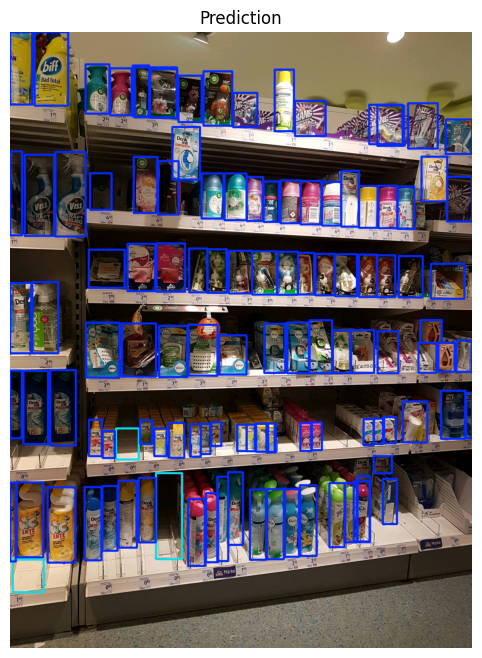

In [8]:
results = model.predict(source=str(image_paths[0]), save=False)

rendered = results[0].plot(labels=False)
img = Image.fromarray(rendered[..., ::-1])

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Prediction')

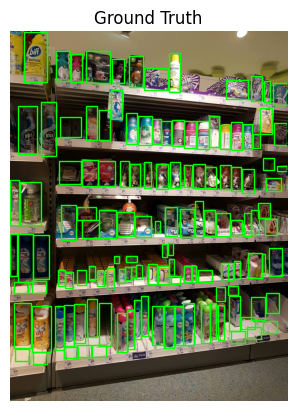

In [9]:

img = Image.open(image_paths[0])
w, h = img.size

with open(label_paths[0], "r") as f:
    labels = [list(map(float, line.strip().split())) for line in f]

fig, ax = plt.subplots()
ax.imshow(img)

for cls, xc, yc, bw, bh in labels:
    x = (xc - bw / 2) * w
    y = (yc - bh / 2) * h
    bw_pix = bw * w
    bh_pix = bh * h
    rect = patches.Rectangle((x, y), bw_pix, bh_pix, linewidth=1, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)


plt.axis('off')
plt.title('Ground Truth')
plt.show()

In [10]:
image_paths[0].replace(".jpg", ".txt")

'data/images/train/test_690.txt'

In [11]:
model.val(data="data/data.yaml", split="test")

Ultralytics 8.3.168 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11871MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7185.5±115.4 MB/s, size: 2510.6 KB)


val: Scanning data/labels/train... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 471.21it/s]

val: New cache created: data/labels/train.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


                   all        100      16888      0.577      0.551      0.536      0.297
                object        100      15811      0.771      0.856      0.872      0.522
                 empty         87       1077      0.383      0.246      0.201     0.0714
Speed: 1.3ms preprocess, 17.8ms inference, 0.0ms loss, 40.1ms postprocess per image
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/val9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x72112f936e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804